In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions.normal import Normal
from torch.distributions.half_cauchy import HalfCauchy
import numpy as np
import matplotlib.pyplot as plt
import importlib
import seaborn as sns
import sys

import layers as layers
import util as util
import networks as networks

torch.set_default_dtype(torch.float64)

In [25]:
sys.path.insert(0, '../exp/')
import util as util_data
import models

In [26]:
importlib.reload(layers)
importlib.reload(util)
importlib.reload(networks)
importlib.reload(models)

<module 'models' from '../exp/models.py'>

### Is the horseshoe with fixed weight still pointy?

Unfixed weight first

In [67]:
n_samp = 1000

dist_scale_local = HalfCauchy(scale=torch.tensor(1.))
dist_scale_global = HalfCauchy(scale=torch.tensor(1.))

global_scale = .1
local_scale = dist_scale_local.sample((n_samp,)).numpy()

beta = np.random.normal(loc=0, scale=global_scale * local_scale)

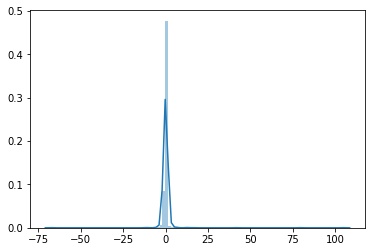

In [68]:
ax = sns.distplot(beta, bins=100)

(-2, 2)

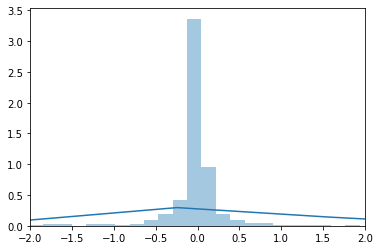

In [69]:
ax = sns.distplot(beta, bins=1000)
ax.set_xlim(-2,2)

(-2, 2)

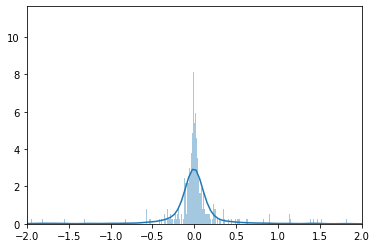

In [70]:
beta_trunc = beta[np.abs(beta)<2.0]
ax = sns.distplot(beta_trunc, bins=1000)
ax.set_xlim(-2,2)

Now fixed weight

In [79]:
n_samp = 1000

dist_scale_local = HalfCauchy(scale=torch.tensor(1.))
dist_scale_global = HalfCauchy(scale=torch.tensor(1.))

global_scale = .1
local_scale = dist_scale_local.sample((n_samp,)).numpy()

beta = np.random.normal() * global_scale * local_scale

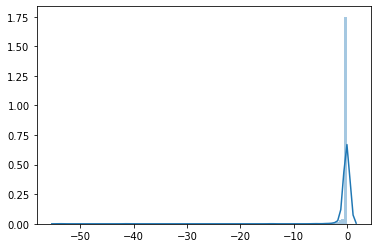

In [80]:
ax = sns.distplot(beta, bins=100)

### Sample functions from prior

In [27]:
torch.manual_seed(2)
model = networks.RffHs(1, 1, dim_hidden=50, sig2_inv=1/.1)

In [28]:
x = torch.linspace(-1,1,100).reshape(-1,1)

In [29]:
m = models.RffHsVarImportance(X=np.array([[0]]), Y=np.array([[0]]), sig2_inv=1/.1, dim_in=1, dim_hidden=50)

In [30]:
m.model.forward(x, weights_type_layer_in='sample_prior', weights_type_layer_out='sample_prior')

tensor([[-1.1769],
        [-1.2217],
        [-1.2669],
        [-1.3124],
        [-1.3582],
        [-1.4043],
        [-1.4505],
        [-1.4968],
        [-1.5433],
        [-1.5897],
        [-1.6361],
        [-1.6825],
        [-1.7287],
        [-1.7748],
        [-1.8206],
        [-1.8661],
        [-1.9113],
        [-1.9562],
        [-2.0006],
        [-2.0445],
        [-2.0878],
        [-2.1306],
        [-2.1728],
        [-2.2142],
        [-2.2550],
        [-2.2949],
        [-2.3340],
        [-2.3723],
        [-2.4096],
        [-2.4460],
        [-2.4814],
        [-2.5158],
        [-2.5491],
        [-2.5812],
        [-2.6122],
        [-2.6420],
        [-2.6706],
        [-2.6979],
        [-2.7240],
        [-2.7487],
        [-2.7721],
        [-2.7941],
        [-2.8147],
        [-2.8338],
        [-2.8516],
        [-2.8679],
        [-2.8827],
        [-2.8960],
        [-2.9078],
        [-2.9181],
        [-2.9268],
        [-2.9341],
        [-2.

In [49]:
n_samp = 100
f_samp = torch.zeros((n_samp, x.shape[0]))

with torch.no_grad():
    for i in range(n_samp):
        f_samp[i,:] = m.model.forward(x, weights_type_layer_in='sample_prior', weights_type_layer_out='sample_prior').reshape(-1)
    
    

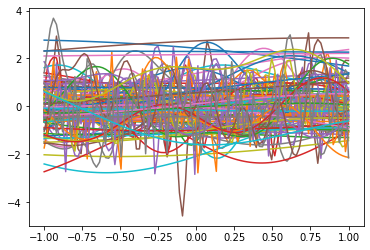

In [50]:
_=plt.plot(x.numpy(), f_samp.numpy().T)

In [51]:
text = 'np.linspace(.01,5,5)'
eval(text)

array([0.01  , 1.2575, 2.505 , 3.7525, 5.    ])

In [54]:
'reg_param=%f.png' % .01

'reg_param=0.010000.png'

In [85]:
cmap = plt.cm.get_cmap('Accent')

(0.6280661284121491, 0.013302575932333718, 0.26082276047673975, 1.0)

In [75]:
psi_mean_mean

array([[ 1.21301691,  0.28725156],
       [-0.46585965, -0.45157675],
       [-0.29501762,  2.81013038]])

In [83]:
cmap()

(0.6280661284121491, 0.013302575932333718, 0.26082276047673975, 1.0)

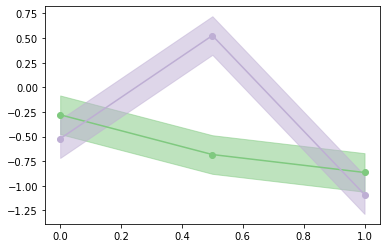

In [90]:
reg_param_list = np.linspace(0,1,3)
psi_mean_mean = np.random.randn(3,2)
dim_in = 2

fig, ax = plt.subplots()
psi_var_mean = .1*np.ones((3,2))

for i in range(dim_in):
    lb = psi_mean_mean[:,i] - 1.96*psi_var_mean[:,i]
    ub = psi_mean_mean[:,i] + 1.96*psi_var_mean[:,i]
    ax.plot(reg_param_list.reshape(-1), psi_mean_mean[:,i], '-o', color=cmap(i))
    ax.fill_between(reg_param_list.reshape(-1), lb, ub, alpha=.5, color=cmap(i))


In [106]:
np.random.normal(scale=2,size=10).astype(np.int64)

array([ 3,  0, -1,  0,  2,  0, -2,  1, -1,  0])

In [107]:
.1**2

0.010000000000000002